## Parte 3 - Laboratorio 2 - Modelación y Simulación

Carol Arévalo, Stefano Aragoni, Luis Santos

------------

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import norm, expon
from scipy.stats import kstest

-------
## Tasks 1

Analice los patrones de llegada de los clientes utilizando diferentes distribuciones de probabilidad

1. Simule las llegadas de clientes durante un período de 10 horas mediante una distribución geométrica con
parámetro p=0,2.

- La geométrica nos dice la probabilidad de que en el enésimo intento, ocurra un determinado suceso.
- Cual es la probabilidad de que en el x intento salga lo esperado


In [30]:
p = 0.2
horas = 10

simulacion = np.random.geometric(p, horas)
print(simulacion)

[ 3  2  7  1  5 10  6  2  6  9]


2. Grafique los tiempos de llegada de los clientes y calcule el tiempo promedio entre llegadas

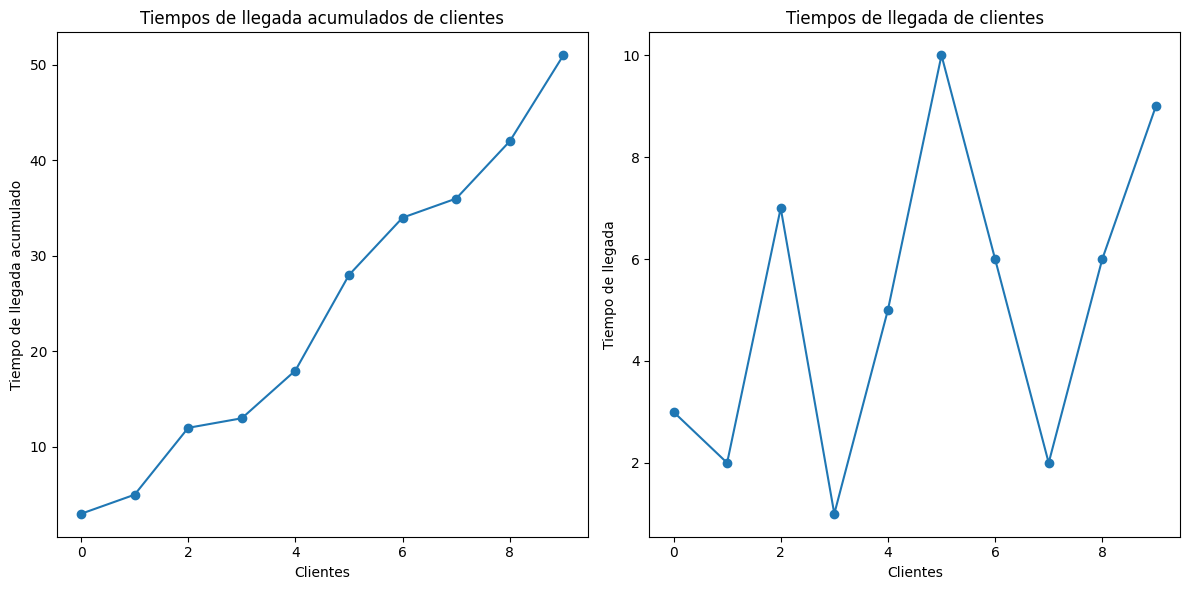

In [31]:
tiempos_acumulados = np.cumsum(simulacion)  # Tiempos de llegada acumulados

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(tiempos_acumulados, 'o-')
axs[0].set_xlabel('Clientes')
axs[0].set_ylabel('Tiempo de llegada acumulado')
axs[0].set_title('Tiempos de llegada acumulados de clientes')

axs[1].plot(simulacion, 'o-')
axs[1].set_xlabel('Clientes')
axs[1].set_ylabel('Tiempo de llegada')
axs[1].set_title('Tiempos de llegada de clientes')

plt.tight_layout()
plt.show()


In [32]:
tiempo = np.mean(simulacion)
print("Tiempo promedio entre llegadas:", tiempo)

Tiempo promedio entre llegadas: 5.1


3. ¿Qué modela la distribución geométrica en este escenario?

La distribución geométrica modela el número de intentos (intervalos de tiempo) por hora, hasta que se observe el primer éxito (llegada de un cliente). En otras palabras, modela la cantidad de intentos (o el tiempo) antes de que llegue el primer cliente por hora.

4. ¿Cómo se compara el tiempo promedio entre llegadas con el valor esperado de la distribución geométrica?

- En este caso, el valor esperado (como se muestra a continuacion) es de 5.0. Este valor se puede calcular experimentalmente al calcular el promedio de los tiempos entre llegadas. En este caso, el promedio es de 5.1, lo cual es muy cercano al valor esperado.

- Esto comprueba que los datos simulados modela correctamente el tiempo entre llegadas de clientes de una distribución geométrica.

In [33]:
# Valor esperado de la distribución geométrica
valor_esperado = 1/p
print("Valor esperado:", valor_esperado)

Valor esperado: 5.0


-------
## Tasks 2

Modele los tiempos de servicio en un sistema de colas utilizando una distribución binomial negativa.

1. Genere una muestra aleatoria de 500 tiempos de servicio a partir de una distribución binomial negativa con
parámetros r=5 y p=0,4.

In [92]:
muestra = np.random.negative_binomial(n=5, p=0.4, size=500)
print(muestra)

[ 4 21  4  2  7  7  5 14  5  6  6 11  7  8  0 12  3  1  7  7  9 18  7  9
  2 10  5  2 15  1  8  6 10  7  6  1  3  5  4 17  4  8  2  6 10  9  2  4
  4 12  4  6 14  8  6 13  5 10 16 11  6  8  2  6  2 10 15  1  5  4 15 12
 10  4  3 10  3  7 12  5  7  8  1  9  0  4  5 17 14  9  8 11  7  5  6 13
 17 18  7  8  8  3 11  5  1  3  5  8  7 13  3  5  4  1 13  6  9  5 10  5
  3  5 14  8  6  6 16  6 13  7  9  5 15  5  7  7  5  5  3  1 11 12 19  8
  8  6 10  2  4  2 13  2  6  8  4  4 10  8  5 15 11 11  4  2  6  6  6  5
  6  5  5  7  3  7  7 11  5  8  6  9  8  7  5  8  7 10  5 10 11  6 11 16
  6 18  8 11  9 14  8  6  9  3  9  7  7  5  8  9  9  4 16  5  9  8  8 13
 18 10  7  5  3  6 10  4  6 12  4  6 12 13 14 11 18  9 12  2  6  4  6  6
 10  7  5  6  3  5  1  3  6  8  1  8  3  4  8  4  9  7  5  4  7 12  7  4
  9  6  4  7  5 15 14  8 14  0  6 12  5 15  3  6  4  4  6  8  6  7  3  6
  7  6 14  5  8  4  4 10  6  2  4  6  4  7 22  9  3  6  4  6  8  7 11  3
  5 10  8 11  2  2  5  4  7  7  2  8  5  5 10 10 10

2. Trace un histograma de los tiempos de servicio y calcule la media y la varianza.

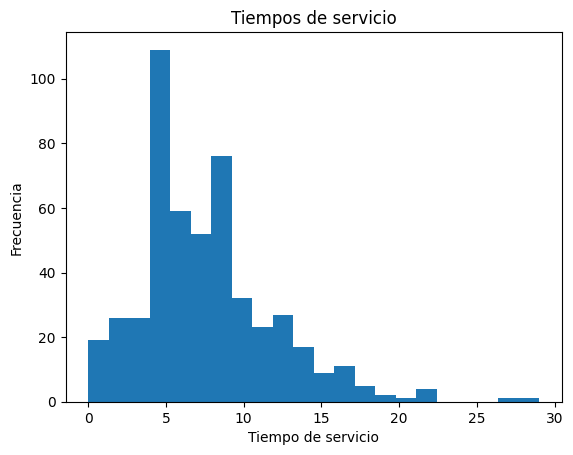

Media: 7.502
Varianza: 18.693996


In [93]:
plt.hist(muestra, bins='auto')
plt.xlabel('Tiempo de servicio')
plt.ylabel('Frecuencia')
plt.title('Tiempos de servicio')
plt.show()

media = np.mean(muestra)
varianza = np.var(muestra)

print('Media:', media)
print('Varianza:', varianza)

3. ¿Cómo se ajusta la distribución binomial negativa a los datos de tiempo de servicio?
- Una distribución binomial negativa es una distribución binomial con forma de campana, pero sesgada hacia la izquierda. Esto se puede observar en el histograma de los tiempos de servicio, donde la mayoría de los tiempos de servicio se encuentran entre 0 y 10, con datos dispersos entre 10 y 30.

En otras palabras, se puede decir que la muestra de datos de tiempo de servicio se ajusta a una distribución binomial negativa con parámetros r=5 y p=0,4.

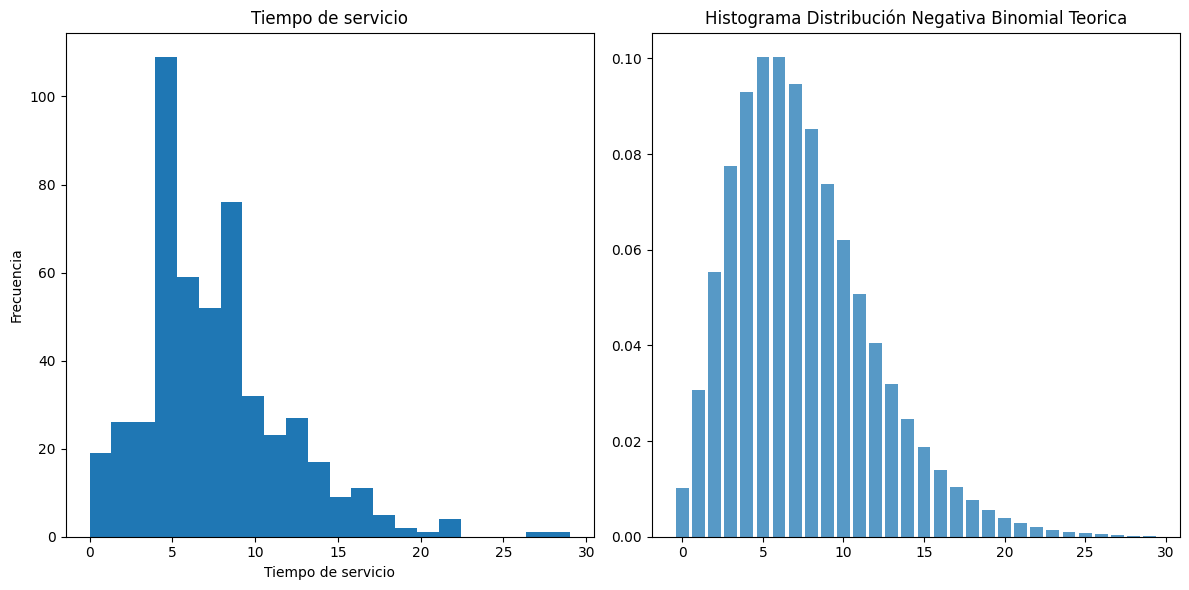

In [94]:
# Create the range of values for the histograms
x = np.arange(0, np.max(muestra) + 1)


y_theoretical = nbinom.pmf(x, 5, 0.4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(muestra, bins='auto')
ax1.set_xlabel('Tiempo de servicio')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Tiempo de servicio')

ax2.bar(x, y_theoretical, alpha=0.75)
ax2.set_title('Histograma Distribución Negativa Binomial Teorica')

plt.tight_layout()
plt.show()



4. Compare la media y la varianza de los datos con los valores teóricos de la distribución binomial negativa.

- Como se puede observar a continuación, la media teorica es de 7.5, mientras que la varianza teorica es de 18.75. 

- En este caso, la media experimental fue de 7.502, lo cual representa un error de 0.02%. Por otro lado, la varianza experimental fue de 18.693, lo cual representa un error de 0.29%. 

En base a esto, se confirma que los datos simulados se ajustan correctamente a la distribución binomial negativa.

In [95]:
r = 5
p = 0.4

media_teorica = r * (1 - p) / p
varianza_teorica = r * (1 - p) / (p**2)

print('Media teórica:', media_teorica)
print('Varianza teórica:', varianza_teorica)

# Error
error_media = abs(media - media_teorica) / media_teorica * 100
error_varianza = abs(varianza - varianza_teorica) / varianza_teorica * 100

print('\nError media:', error_media, '%')
print('Error varianza:', error_varianza, '%')

Media teórica: 7.5
Varianza teórica: 18.749999999999996

Error media: 0.02666666666666373 %
Error varianza: 0.29868799999998913 %


-------
## Tasks 3

Deberá analizar los tiempos de procesamiento en un sistema usando una distribución hipergeométrica

# PREGUNTAR A ALBERTO SI ESTO TIENE SENTIDO. 
### La simulación regresa cuantos elementos seleccionados de la muestra son no defectuosos, no el tiempo de procesamiento. Entonces, no tiene sentido hablar de tiempo de procesamiento en este caso.

1. Simule los tiempos de procesamiento de 50 tareas en un sistema con 10 artículos defectuosos y 40
artículos no defectuosos.

In [238]:
simulacion = np.random.hypergeometric(ngood=40, nbad=10, nsample=5, size=50)
print(simulacion)

[4 5 3 4 5 5 5 3 5 5 3 4 5 4 5 4 2 5 5 4 4 2 4 4 5 4 4 4 4 5 4 5 4 4 4 4 5
 5 2 3 3 4 4 3 5 4 4 4 4 3]


2. Grafique los tiempos de procesamiento y calcule la media y la varianza.

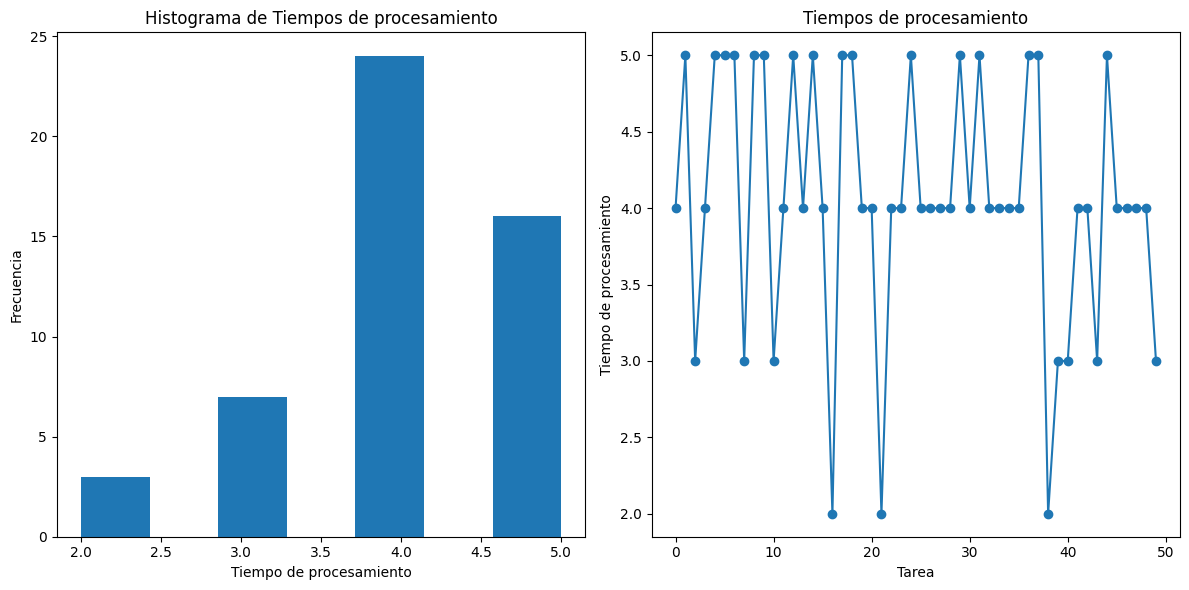

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(simulacion, bins='auto')
axs[0].set_xlabel('Tiempo de procesamiento')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de Tiempos de procesamiento')

axs[1].plot(simulacion, 'o-')
axs[1].set_xlabel('Tarea')
axs[1].set_ylabel('Tiempo de procesamiento')
axs[1].set_title('Tiempos de procesamiento')

plt.tight_layout()
plt.show()

In [240]:
media = np.mean(simulacion)
varianza = np.var(simulacion)

print('Media:', media)
print('Varianza:', varianza)

Media: 4.06
Varianza: 0.6963999999999999


# PREGUNTAR A ALBERTO

3. ¿Cómo modela la distribución hipergeométrica los tiempos de procesamiento en este escenario?

En este caso, la distribución hipergeométrica indica que retorna: "samples from the parameterized hypergeometric distribution. Each sample is the number of good items within a randomly selected subset of size nsample taken from a set of ngood good items and nbad bad items". 

- En otras palabras, la distribución hipergeométrica retorna en cada iteración el número de elementos no defectuosos en una muestra de tamaño nsample, tomada de un conjunto de ngood elementos no defectuosos y nbad elementos defectuosos.


- Como resultado, la distribución hipergeométrica modela los tiempos de procesamiento a través de la cantidad de elementos no defectuosos en una muestra de tamaño nsample. Entonces si cada una de las 50 tareas representa el proceso de seleccionar una muestra de tamaño nsample, entonces la cantidad de elementos no defectuosos en cada muestra representa el tiempo de procesamiento de cada tarea.

4. ¿Existen patrones en los tiempos de procesamiento de los artículos defectuosos frente a los no
defectuosos?

Como se mencionó anteriormente, los valores que son más altos representan que se tiene muestras con mayor cantidad de elementos no defectuosos. Como resultado, en base a la forma de modelar el tiempo de procesamiento... se puede decir que los tiempos de procesamiento de los artículos no defectuosos son mayores que los tiempos de procesamiento de los artículos defectuosos.

Por ejemplo, si se tiene [1,2,5,5] como muestra, esto significa que en la primera iteración 1 de 5 elementos eran no defectuosos. En la segunda iteración, 2 de 5 elementos eran no defectuosos. En la tercera iteración, 5 de 5 elementos eran no defectuosos. En la cuarta iteración, 5 de 5 elementos eran no defectuosos.

Como resultado, se podría detectar un patrón, ya que tiempo más bajo repersenta que se tiene una muestra con mayor cantidad de elementos defectuosos.

-------
## Tasks 4

En este ejercicio deberá comparar la bondad de ajuste (goodness-of-fit) de diferentes distribuciones de probabilidad
para un conjunto de datos determinado.

1. Genere una muestra aleatoria de 1000 puntos de datos de una distribución desconocida.

In [253]:
np.random.seed(2)
muestra = np.random.randn(1000) 

2. Ajuste varias (mínimo 2) distribuciones (e.gj., normal, exponencial, gamma) a los datos mediante MLE.

In [254]:
normal = norm.fit(muestra)       # fit -> Maximum Likelihood Estimation
exponencial = expon.fit(muestra) # fit -> Maximum Likelihood Estimation

3. Trace los histogramas de los datos y las distribuciones que mejor se ajustan en el mismo gráfico.

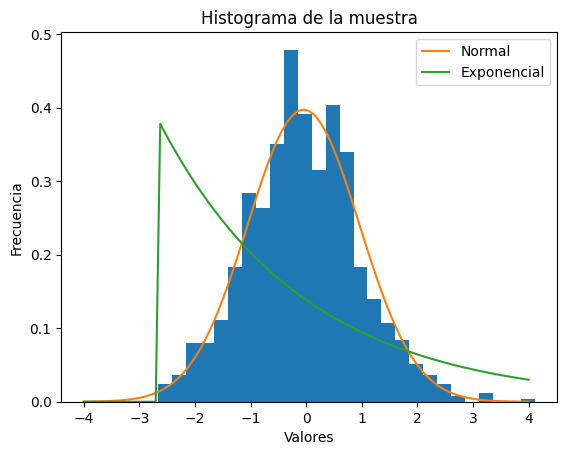

In [255]:
# Graficar histograma
plt.hist(muestra, bins='auto', density=True)

# Graficar curvas de ajuste
x = np.linspace(-4, 4, 100)
y_normal = norm.pdf(x, normal[0], normal[1])
y_exponencial = expon.pdf(x, exponencial[0], exponencial[1])

plt.plot(x, y_normal, label='Normal')
plt.plot(x, y_exponencial, label='Exponencial')

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la muestra')
plt.legend()
plt.show()


4. ¿Qué distribución representa mejor los datos basados en la inspección visual?

- En este caso, pareciera que la distribución normal se ajusta mejor a los datos, ya que la forma del histograma se asemeja a la forma de la distribución normal. Esto debido a que se presenta la forma de campana, con la mayoría de los datos en el centro y otros datos dispersos en los extremos.

5. Realice una prueba de bondad de ajuste (p. ej., Kolmogorov-Smirnov) para cada distribución e interprete los
resultados.

In [261]:
ks_normal, p_normal = kstest(muestra, 'norm', args=normal)
ks_exp, p_exp = kstest(muestra, 'expon', args=exponencial)

print("Distribución Normal \t\t Estadístico KS:", ks_normal, "\t P:", p_normal)
print("Distribución Exponencial \t Estadístico KS:", ks_exp, "\t P:", p_exp)

Distribución Normal 		 Estadístico KS: 0.0229906459137732 	 P: 0.6571388703157213
Distribución Exponencial 	 Estadístico KS: 0.311327540281896 	 P: 1.3370937969060258e-86


- Distribucion Normal: El valor KS es muy bajo, (0.02299), lo cual indica un buen ajuste entre la distribución y los datos. Asimismo, el valor P es relativamente alto, por lo cual no hay suficiente evidencia para rechazar la hipótesis de que sí se ajustan bien los datos a la distribución. Como conclusión, se puede decir que la distribución Normal representa bien los datos basándonos tanto en la prueba de bondad de ajuste como en la inspección visual.

- Distribucion Exponencial: El valor KS es relativamente grande (0.3113), por lo cual se puede decir que hay un peor ajuste entre la distribución y los datos (esto a comparación con la distribución normal). Asimismo, el valor P es muy pequeño, por lo cual se puede rechazar la hipótesis de que sí se ajustan bien los datos a la distribución. Como conclusión, se puede decir que la distribución Exponencial no representa bien los datos basándonos tanto en la prueba de bondad de ajuste como en la inspección visual.